Big-Data for Computational Finance
Academic Year: 2023/24
Assignment 1
Sofia Sampogna Montemayor


## Model
### The model can briefly be described as follows. Assume we have some capital and n different assets. A fraction xj of the total capital is invested in asset j, for j = 1, …, n. The annual (or daily) return of each asset is modelled as a random variable ξj

### The random variables can be correlated and it is assumed that the expected values µj = E[ξj] and the covariance matrix Cij = E[(ξi − µi)(ξj − µj)] are known, for any i, j = 1, …, n. The annual return of an asset is defined as the relative change of the asset price in a year. For given expected returns µ = (µ1, …, µn), given correlation matrix C and a given expected return of the portfolio, r = µTx,the Markowitz portfolio optimization problem is then to determine the vector x = (x1, …, xn)^T that minimises the variance of the portfolio, i.e.

\begin{align*} \min & \hspace{1cm}& x^T Cx \ \text{subject to} & \\ \hspace{1cm}&µ^T x = r \geq 14\ & \\ \hspace{1cm}&e^T x = 1 where e = (1, ..., 1)^T \geq 13\ & \\ \hspace{1cm}&x>=0 \geq 15\end{align*}

In [118]:
import numpy as np
import random

n = 8

# replace d1 with the second-to-last digit of your registration number
# replace d2 with the last digit of your registration number
d1 = 1
d2 = 0

dummystep = 10*d1+d2

for _ in range(dummystep):
    dummy = random.uniform(0,1)
    
corr = np.array([[0]*n for _ in range(n)], dtype = float)
for i in range(n):
    for j in range(n):
        corr[i][j] = (-1)**abs(i-j)/(abs(i-j)+1)
ssigma = np.array([[0]*1 for _ in range(n)], dtype = float)

# mmu is the vector μ in the assignment
mmu = np.array([[0]*1 for _ in range(n)], dtype = float)
ssigma[0] = 2
mmu[0] = 3
for i in range(n-1):
    ssigma[i+1] = ssigma[i] + 2*random.uniform(0,1)
    mmu[i+1] = mmu[i] + 1

ddiag = np.array([[0]*n for _ in range(n)], dtype = float)
np.fill_diagonal(ddiag, ssigma)
C2 = np.matmul(np.matmul(ddiag,corr), ddiag)
# C is the matrix C in the assignment
C = 0.5*(C2 + C2.T)

print(C)

[[  4.          -2.76595852   2.10677745  -1.59374427   2.06254495
   -2.22329696   2.29571127  -2.39784935]
 [ -2.76595852   7.65052655  -4.37044428   2.93882036  -3.56557111
    3.6897283   -3.70407459   3.78991534]
 [  2.10677745  -4.37044428   9.98665022  -5.03649671   5.43165397
   -5.26949087   5.07838036  -5.05173493]
 [ -1.59374427   2.93882036  -5.03649671  10.16008313  -8.21792295
    7.08673356  -6.40285918   6.11449385]
 [  2.06254495  -3.56557111   5.43165397  -8.21792295  26.58807288
  -17.19618716  13.81043907 -12.36418017]
 [ -2.22329696   3.6897283   -5.26949087   7.08673356 -17.19618716
   44.48744429 -26.7962514   21.32452469]
 [  2.29571127  -3.70407459   5.07838036  -6.40285918  13.81043907
  -26.7962514   64.5610554  -38.53338848]
 [ -2.39784935   3.78991534  -5.05173493   6.11449385 -12.36418017
   21.32452469 -38.53338848  91.99490425]]


## Task 1

Task 1 asks us to solve Markowitz Optimization for values skiping on 0.25 intervals from 3 to 9. This means we will have 25 values at the end of this task. The standard deviation of each portafolio, and the expected values µ will be saved into verctors to be able to plot the efficent frontier. 

In [128]:
from scipy.optimize import minimize

#Adjust the given numpy array by flattening it to avoid data type handling issues. 
mmu = mmu.flatten()

def markowitz_optimization_1(C, mmu, n, expected_return):

    constraints = [
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}, # Constraint to make sum of weights of invesments in the portafolio to be equal to 1
        {'type': 'eq', 'fun': lambda x: np.dot(mmu, x) - expected_return} # Constraint to make the expected return of the portafolio to be equal to the given expected return
    ]
    bounds = tuple((0, 1) for _ in range(n)) # Bounds for each weight of the investments in the portafolio, making them all positive avoids the use of shortselling

    def objective(x):
        return np.dot(np.dot(x.T, C), x) # Objective function to minimize the variance of the portafolio

    x0 = np.array([1./n] * n) # Initial  investments in the portafolio, setting them to equal numbers. 

    result = minimize(objective, x0, method='SLSQP', bounds=bounds, constraints=constraints) # Calling minimize for the objective function with the given constraints and bounds

    optimal_weights = result.x # Getting the optimal weights of the investments in the portafolio
    portfolio_variance = np.dot(np.dot(optimal_weights.T, C), optimal_weights) # Getting the variance of the portafolio
    return portfolio_variance


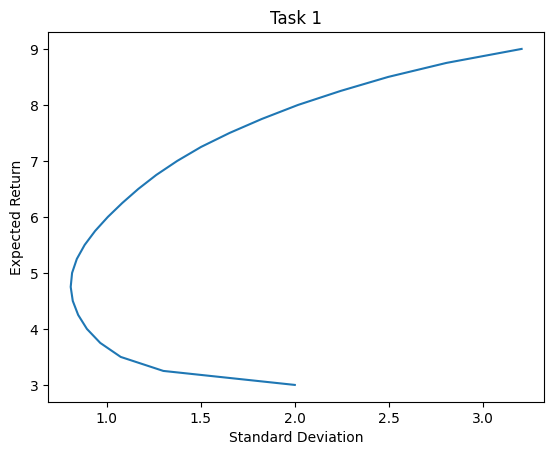

In [132]:
r = [3, 3.25, 3.5, 3.75, 4, 4.25, 4.5, 4.75, 5, 5.25, 5.5, 5.75, 6, 6.25, 6.5, 6.75, 7, 7.25, 7.5, 7.75, 8, 8.25, 8.5, 8.75, 9]
variances = []
for ex in r: 
    variances.append(markowitz_optimization_1(C, mmu, n, ex))
    
std_deviations = np.sqrt(variances)

plt.plot(std_deviations, r)
plt.xlabel('Standard Deviation')
plt.ylabel('Expected Return')
plt.title('Task 1')
plt.show()





The plot shows us the efficent frontier. Standard deviation can be interpreted as the risk of a portafolio, so one with a constant standard deviation but a greater expected return would be prefered. However each point in the graph can represent an investor's preference in risk/reward. 

## Task 2

Task 2 calls for the creation of a very similar process but changing one of the constraints from Task 1. The investor no longer needs to invest all of their capital, so instead of making the sum of the the weights in the assets no longer needs to be equal to one, instead it needs to be less than or equal to 1. The code will be commented only on this difference. The results will also be plotted to see the changes in the relationship of the expected return and the obtained standard deviation. 

In [130]:
def markowitz_optimization_2(C, mmu, n, expected_return):

    constraints = [
        {'type': 'ineq', 'fun': lambda x: 1 - np.sum(x)}, # Constraint to make sum of weights of invesments in the portafolio to be less than or equal to 1
        {'type': 'eq', 'fun': lambda x: np.dot(mmu, x) - expected_return}
    ]
    
    # Define the bounds for the asset weights
    bounds = [(0, 1) for _ in range(n)]

    def objective(x):
        return np.dot(np.dot(x.T, C), x)

    x0 = np.array([1./n] * n)

    result = minimize(objective, x0, method='SLSQP', bounds=bounds, constraints=constraints)

    optimal_weights = result.x
    portfolio_variance = np.dot(np.dot(optimal_weights.T, C), optimal_weights)
    return portfolio_variance


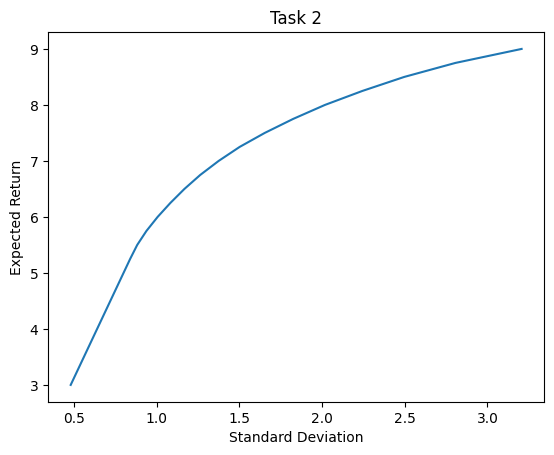

In [133]:
r = [3, 3.25, 3.5, 3.75, 4, 4.25, 4.5, 4.75, 5, 5.25, 5.5, 5.75, 6, 6.25, 6.5, 6.75, 7, 7.25, 7.5, 7.75, 8, 8.25, 8.5, 8.75, 9]
variances = []
for ex in r: 
    variances.append(markowitz_optimization_2(C, mmu, n, ex))
    
import numpy as np
std_deviations = np.sqrt(variances)

plt.plot(std_deviations, r)
plt.xlabel('Standard Deviation')
plt.ylabel('Expected Return')
plt.title('Task 2')
plt.show()





We can see in Task's 2 plot, that unlike in Task 1, there are no repeated values in the standard deviation's axis. In general the higher the expected return the higher the risk, and that makes sense because it is easier to achieve a lower return by investing a lesser amount of capital and keeping the rest constant. However it is important to remember the invesment choices will depend on an investor's risk tolerance and expected return. This kind of invesment strategy could also be used to invest in other assets like real estate, or even bonds. This analysis only focuses on the starting 8 assets, but it is important to note these aditional invesments could also be graphed and included. The use of bounds would probably decrease risk and therefore standard deviation but still getting a return on invesment over time. 

## Task 3

Task 3 once again changes one of the constraints seen in Task 1. Instead of having µ^T x = r, we will see µ^T x >= r. This means the sum of all the expected returns of the assets can be greater than or equal to the expected return of the portafolio (r). Again, only the differences between this function and thr function in task 1 will be commented. 


In [135]:
def markowitz_optimization_3(C, mmu, n, expected_return):

    constraints = [
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}, 
        {'type': 'ineq', 'fun': lambda x: np.dot(mmu, x) - expected_return} # Constraint to make the expected return of the portafolio to be greater than or equal to the given expected return
    ]
    bounds = tuple((0, 1) for _ in range(n))

    def objective(x):
        return np.dot(np.dot(x.T, C), x)

    x0 = np.array([1./n] * n)

    result = minimize(objective, x0, method='SLSQP', bounds=bounds, constraints=constraints)

    optimal_weights = result.x
    portfolio_variance = np.dot(np.dot(optimal_weights.T, C), optimal_weights)
    return portfolio_variance
    #portfolio_variance, optimal_weights, result.success, result.message


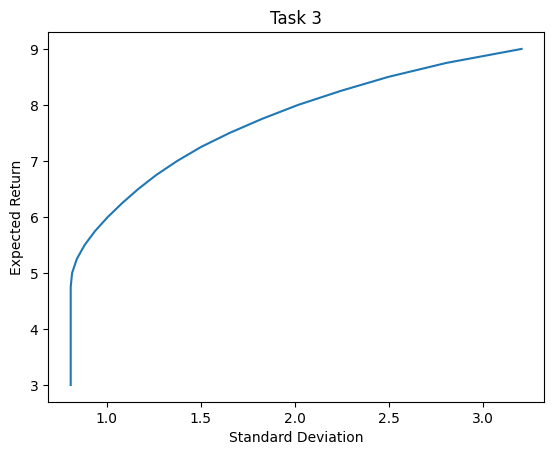

In [136]:
r = [3, 3.25, 3.5, 3.75, 4, 4.25, 4.5, 4.75, 5, 5.25, 5.5, 5.75, 6, 6.25, 6.5, 6.75, 7, 7.25, 7.5, 7.75, 8, 8.25, 8.5, 8.75, 9]
variances = []
for ex in r: 
    variances.append(markowitz_optimization_3(C, mmu, n, ex))
    
std_deviations = np.sqrt(variances)

plt.plot(std_deviations, r)
plt.xlabel('Standard Deviation')
plt.ylabel('Expected Return')
plt.title('Task 3')
plt.show()


This graph shows us a constant standard deviation for the first expected returns, this means they probably have very similar invesment strategies, but that is not confirmed just by looking at this graph. However the algorithm still tries to minimize variance, so after the expected return of 5, the standard deviation increases to meet invesment returns expectations. This will naturaly increase the risk, and the standard deviation. In this graph, a low risk investor would be better off investing with an expected return of 5 in mind, instead of 3 because of how similar the risks represented by the standard deviation are. 

## Task 4

Again this task starts by replicating what was done in task 1; however, with one little but important change. Now shortselling is possible: this means that we can have negative weights representing borrowing assets today and immediately selling them at market price (predicting the price will go down). This means the bounds of the weights will change and the constraints will remain the same. The lower bound will now be equal to -1 instead of 0 representing the short selling. 

In [137]:
def markowitz_optimization_4(C, mmu, n, expected_return):

    constraints = [
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}, 
        {'type': 'eq', 'fun': lambda x: np.dot(mmu, x) - expected_return} 
    ]
    bounds = tuple((-1, 1) for _ in range(n))

    def objective(x):
        return np.dot(np.dot(x.T, C), x)

    x0 = np.array([1./n] * n)

    result = minimize(objective, x0, method='SLSQP', bounds=bounds, constraints=constraints)

    optimal_weights = result.x
    portfolio_variance = np.dot(np.dot(optimal_weights.T, C), optimal_weights)
    return portfolio_variance
    #portfolio_variance, optimal_weights, result.success, result.message


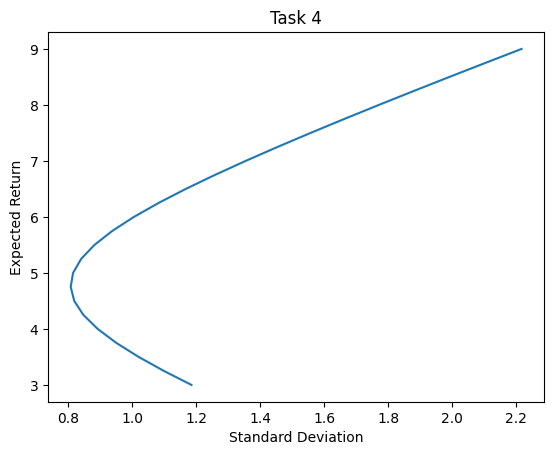

In [138]:
r = [3, 3.25, 3.5, 3.75, 4, 4.25, 4.5, 4.75, 5, 5.25, 5.5, 5.75, 6, 6.25, 6.5, 6.75, 7, 7.25, 7.5, 7.75, 8, 8.25, 8.5, 8.75, 9]
variances = []
for ex in r: 
    variances.append(markowitz_optimization_4(C, mmu, n, ex))
    
std_deviations = np.sqrt(variances)

plt.plot(std_deviations, r)
plt.xlabel('Standard Deviation')
plt.ylabel('Expected Return')
plt.title('Task 4')
plt.show()

The graph looks very similar to task 1's but with an overall lower risk represented by the standard deviation. Having a expected return of 5 will provide the least standard deviation and therefore risk. As in all previous cases, the investors risk tolerance will decide what is the ideal portafolio for them. We can see an overall better performance by shortselling because we have lower standard deviations for each of the portafolio's expected returns. This means that some of the assets in our µ and covariance matrix might not be having the best performance. 